# Classification Promotion on sales data

## 1. import package and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = 'classification_pro_train.csv'
df_train = pd.read_csv(train_path)

df_train.head()

,date,sales_in,stores,pro,pro_npro,offtake
0,7/13/2020,4170,19336,RSP,0,5.5161
1,7/20/2020,35,21440,2for,1,8.2377
2,7/27/2020,256,24646,2for,1,11.9070
3,8/3/2020,756,23780,2for,1,11.1780
4,8/10/2020,452,23017,2for,1,10.2789


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      105 non-null    object 
 1   sales_in  105 non-null    int64  
 2   stores    105 non-null    int64  
 3   pro       105 non-null    object 
 4   pro_npro  105 non-null    int64  
 5   offtake   105 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 5.0+ KB


In [4]:
print(df_train.shape)

(105, 6)


### Basic datafram checking

In [5]:
df_train.columns 

Index(['date', 'sales_in', 'stores', 'pro', 'pro_npro', 'offtake'], dtype='object')

In [6]:
df_train.isnull().sum()

date        0
sales_in    0
stores      0
pro         0
pro_npro    0
offtake     0
dtype: int64

### Deal with date

In [7]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['week_of_year'] = df_train['date'].dt.week

C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\2241832040.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['week_of_year'] = df_train['date'].dt.week


In [8]:
df_train.head()

,date,sales_in,stores,pro,pro_npro,offtake,year,month,week_of_year
0,2020-07-13,4170,19336,RSP,0,5.5161,2020,7,29
1,2020-07-20,35,21440,2for,1,8.2377,2020,7,30
2,2020-07-27,256,24646,2for,1,11.9070,2020,7,31
3,2020-08-03,756,23780,2for,1,11.1780,2020,8,32
4,2020-08-10,452,23017,2for,1,10.2789,2020,8,33


## 2. Data Visualization

<AxesSubplot: xlabel='pro', ylabel='count'>

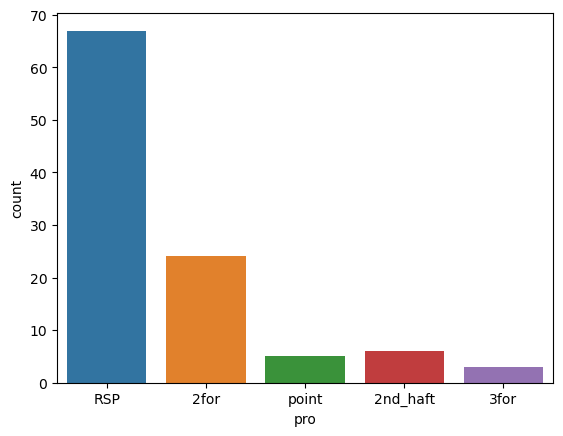

In [9]:
sns.countplot(x=df_train["pro"])

In [10]:
df_train = df_train[['date','year','month','week_of_year','sales_in','stores','offtake','pro','pro_npro']]
df_train = df_train.rename(columns = {'pro_npro' : 'pro_class'})

In [11]:
df_train

,date,year,month,week_of_year,sales_in,stores,offtake,pro,pro_class
0,2020-07-13,2020,7,29,4170,19336,5.5161,RSP,0
1,2020-07-20,2020,7,30,35,21440,8.2377,2for,1
2,2020-07-27,2020,7,31,256,24646,11.9070,2for,1
3,2020-08-03,2020,8,32,756,23780,11.1780,2for,1
4,2020-08-10,2020,8,33,452,23017,10.2789,2for,1
...,...,...,...,...,...,...,...,...,...
100,2022-08-29,2022,8,35,52,7553,7.9218,RSP,0
101,2022-09-05,2022,9,36,120,7371,7.1928,RSP,0
102,2022-09-12,2022,9,37,73,6809,6.2937,RSP,0
103,2022-09-19,2022,9,38,93,6812,6.3666,RSP,0


<AxesSubplot: xlabel='pro_class', ylabel='count'>

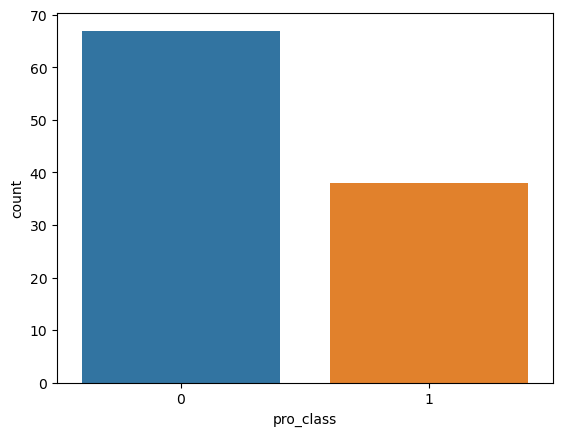

In [12]:
sns.countplot(x=df_train["pro_class"])

In [13]:
df_train[df_train['pro_class'] == 0]['pro_class'].count()

67

In [14]:
df_train[df_train['pro_class'] == 1]['pro_class'].count()

38

In [15]:
df_train['pro_class'].count()

105

In [16]:
print("majority_class: ", df_train[df_train['pro_class'] == 0]['pro_class'].count() / df_train['pro_class'].count())
print("minority_class: ", df_train[df_train['pro_class'] == 1]['pro_class'].count() / df_train['pro_class'].count())

majority_class:  0.638095238095238
minority_class:  0.3619047619047619


### explore target class through other continuous feature

<AxesSubplot: xlabel='date', ylabel='offtake'>

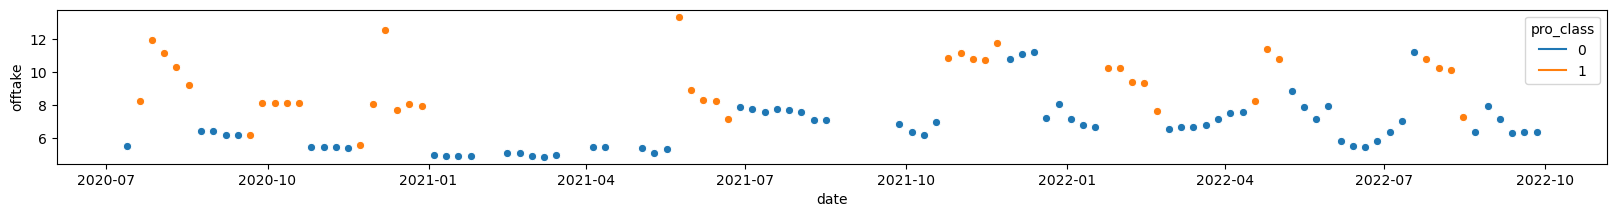

In [17]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='stores'>

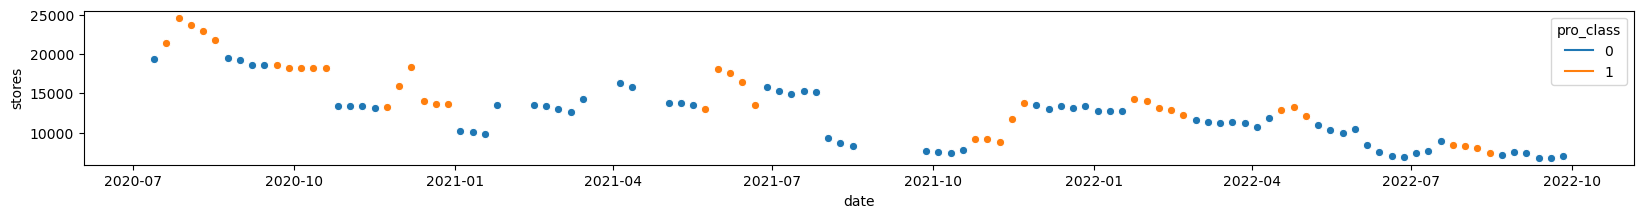

In [18]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train, x="date", y="stores", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='sales_in'>

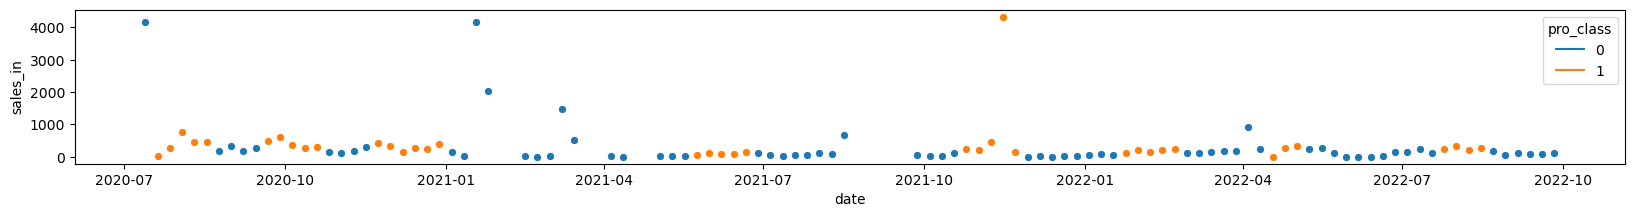

In [19]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_train, x="date", y="sales_in", marker='o', linestyle='',hue="pro_class")

### correlation checking

In [20]:
df_corr = df_train.corr().abs()

C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\2377836558.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_train.corr().abs()


<AxesSubplot: >

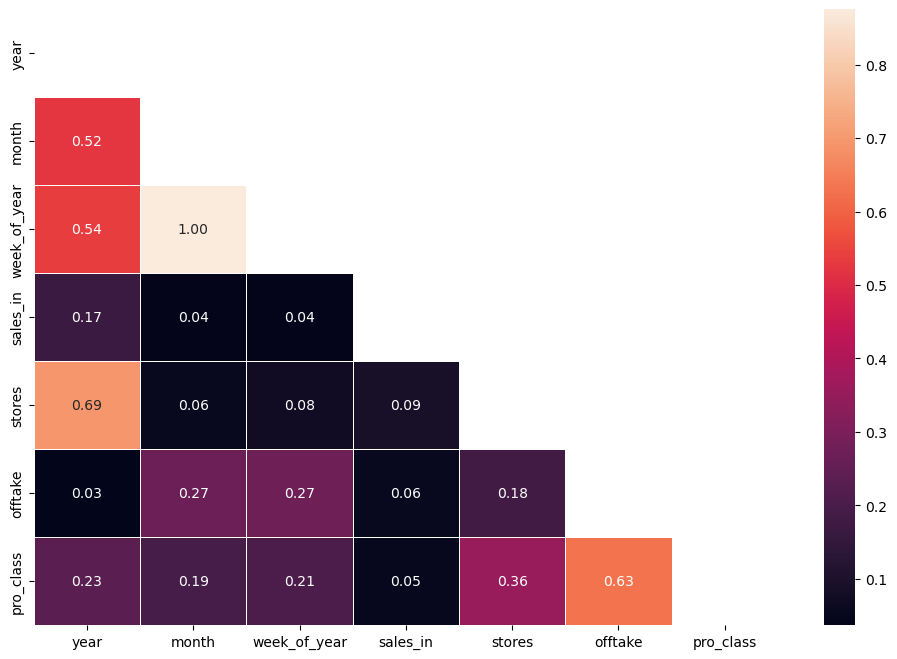

In [21]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, fmt=".2f", linewidths=.5, mask=mask, robust=True)

In [22]:
df_train.columns

Index(['date', 'year', 'month', 'week_of_year', 'sales_in', 'stores',
       'offtake', 'pro', 'pro_class'],
      dtype='object')

In [23]:
features_columns = ['month', 'week_of_year', 'sales_in', 'stores','offtake']

In [25]:
train = df_train[:90]
valid = df_train[90:]

<AxesSubplot: xlabel='date', ylabel='offtake'>

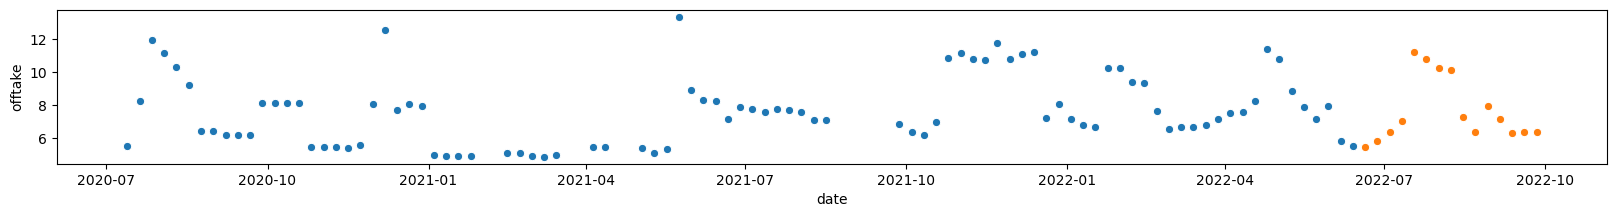

In [26]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='')
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='')

C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


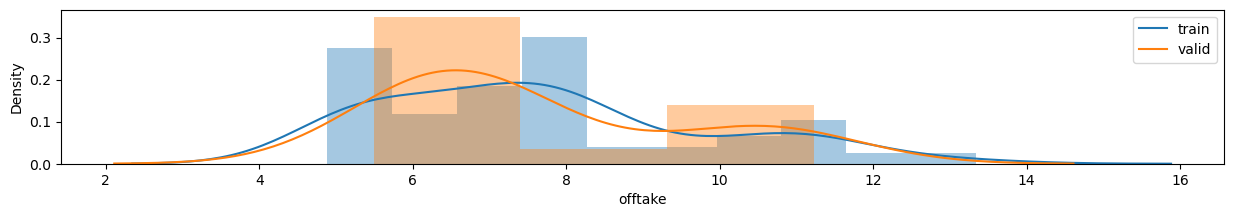

In [27]:
plt.figure(figsize=(15, 2));
sns.distplot(train["offtake"]);
sns.distplot(valid["offtake"]);
plt.legend(["train", "valid"])

C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


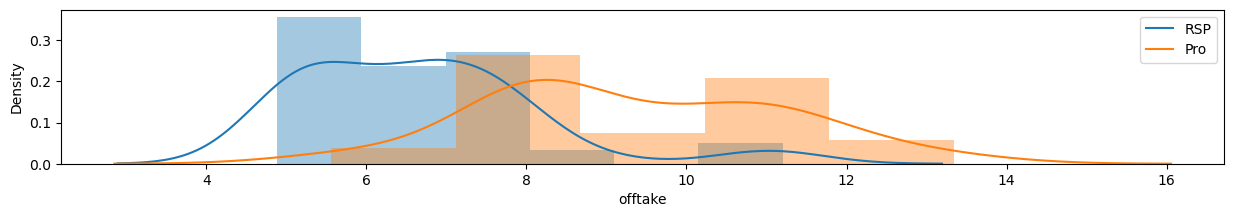

In [28]:
plt.figure(figsize=(15, 2));
sns.distplot(train[train['pro_class'] == 0]["offtake"]);
sns.distplot(train[train['pro_class'] == 1]["offtake"]);
plt.legend(["RSP", "Pro"])

C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


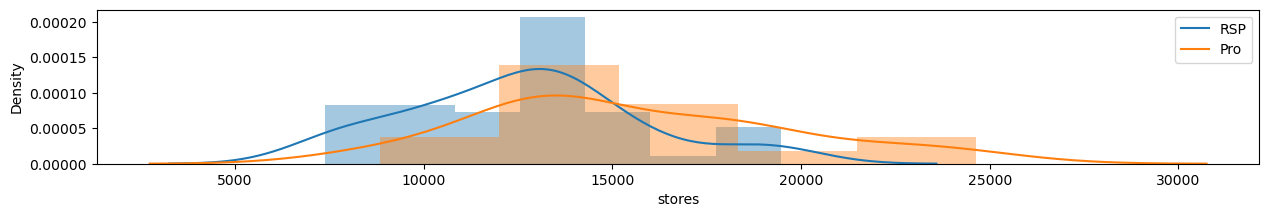

In [29]:
plt.figure(figsize=(15, 2));
sns.distplot(train[train['pro_class'] == 0]["stores"]);
sns.distplot(train[train['pro_class'] == 1]["stores"]);
plt.legend(["RSP", "Pro"])

C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


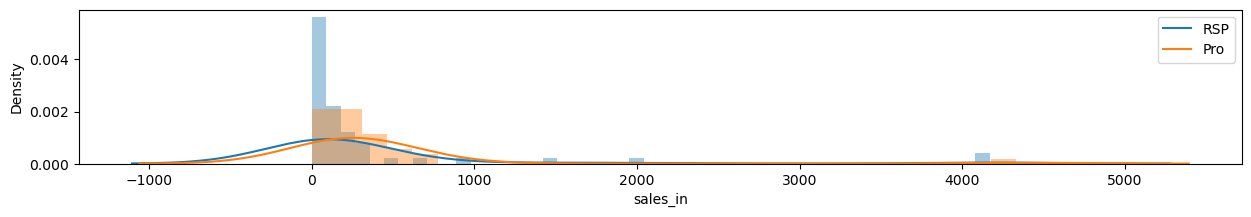

In [30]:
plt.figure(figsize=(15, 2));
sns.distplot(train[train['pro_class'] == 0]["sales_in"]);
sns.distplot(train[train['pro_class'] == 1]["sales_in"]);
plt.legend(["RSP", "Pro"])

C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


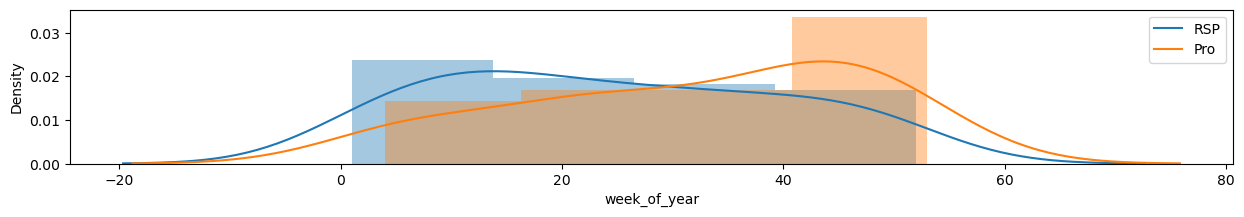

In [31]:
plt.figure(figsize=(15, 2));
sns.distplot(train[train['pro_class'] == 0]["week_of_year"]);
sns.distplot(train[train['pro_class'] == 1]["week_of_year"]);
plt.legend(["RSP", "Pro"])

## 3. Preprocessing 

In [32]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [33]:
#norm = MinMaxScaler()
#stand = StandardScaler()

In [34]:
features_columns

['month', 'week_of_year', 'sales_in', 'stores', 'offtake']

In [35]:
X_train = train[features_columns].values
X_val = valid[features_columns].values

y_train = train["pro_class"].tolist()
y_val = valid["pro_class"].tolist()

In [36]:
X_train.shape, X_val.shape

((90, 5), (15, 5))

In [37]:
X_train[0:5]

array([[7.00000e+00, 2.90000e+01, 4.17000e+03, 1.93360e+04, 5.51610e+00],
       [7.00000e+00, 3.00000e+01, 3.50000e+01, 2.14400e+04, 8.23770e+00],
       [7.00000e+00, 3.10000e+01, 2.56000e+02, 2.46460e+04, 1.19070e+01],
       [8.00000e+00, 3.20000e+01, 7.56000e+02, 2.37800e+04, 1.11780e+01],
       [8.00000e+00, 3.30000e+01, 4.52000e+02, 2.30170e+04, 1.02789e+01]])

## 4. Model & Measure regression performance

### 4.1 DecisionTreeClassifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]}

In [40]:
clf_tree = DecisionTreeClassifier(random_state=2022)

In [41]:
grid = GridSearchCV(estimator=clf_tree, 
                    param_grid=param_grid, 
                    scoring="f1", 
                    n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='f1')

In [42]:
print(grid.best_score_)
print(grid.best_estimator_.max_depth)

0.5906590004422821
5


In [43]:
opt_clf_tree = DecisionTreeClassifier(max_depth=5, random_state=2022)
opt_clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2022)

In [44]:
y_train_opt_clf_tree = opt_clf_tree.predict(X_train)
y_val_opt_clf_tree = opt_clf_tree.predict(X_val)

In [45]:
acc =  accuracy_score(y_train, y_train_opt_clf_tree)
cm = confusion_matrix(y_train, y_train_opt_clf_tree)

In [46]:
print(acc)

0.9888888888888889


In [47]:
print(cm)

[[56  0]
 [ 1 33]]


In [48]:
print( classification_report(y_train, y_train_opt_clf_tree, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       0.98      1.00      0.99        56
         pro       1.00      0.97      0.99        34

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



In [49]:
acc =  accuracy_score(y_val, y_val_opt_clf_tree)
cm = confusion_matrix(y_val, y_val_opt_clf_tree)

In [50]:
print(acc)

0.8666666666666667


In [51]:
print(cm)

[[10  1]
 [ 1  3]]


In [52]:
print( classification_report(y_val, y_val_opt_clf_tree, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       0.91      0.91      0.91        11
         pro       0.75      0.75      0.75         4

    accuracy                           0.87        15
   macro avg       0.83      0.83      0.83        15
weighted avg       0.87      0.87      0.87        15



In [53]:
train["baseline"] = y_train_opt_clf_tree
valid["baseline"] = y_val_opt_clf_tree

C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\1149549555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["baseline"] = y_train_opt_clf_tree
C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\1149549555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["baseline"] = y_val_opt_clf_tree


<AxesSubplot: xlabel='date', ylabel='offtake'>

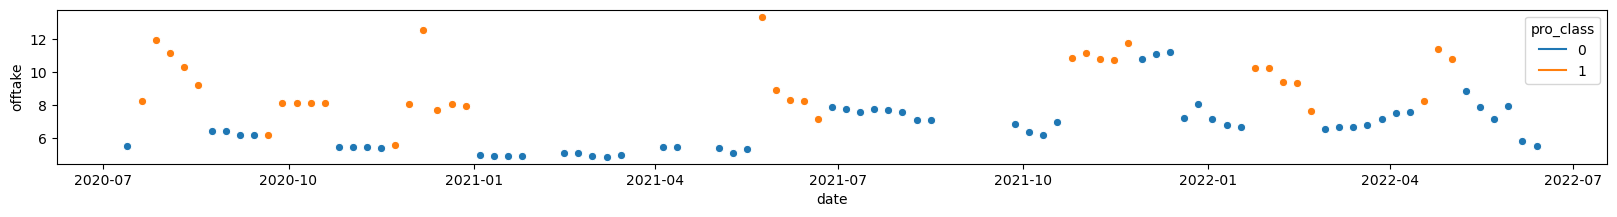

In [54]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='offtake'>

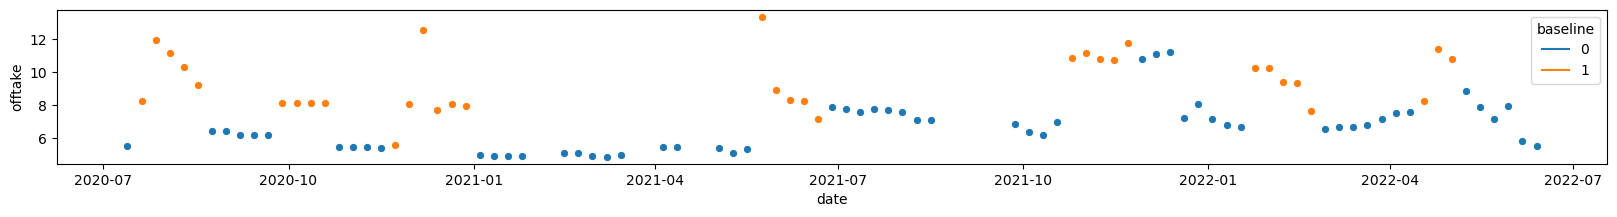

In [55]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='',hue="baseline")

<AxesSubplot: xlabel='date', ylabel='offtake'>

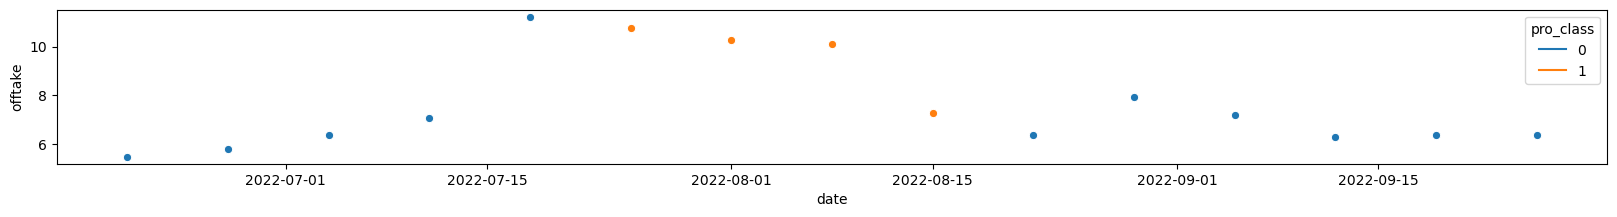

In [56]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='offtake'>

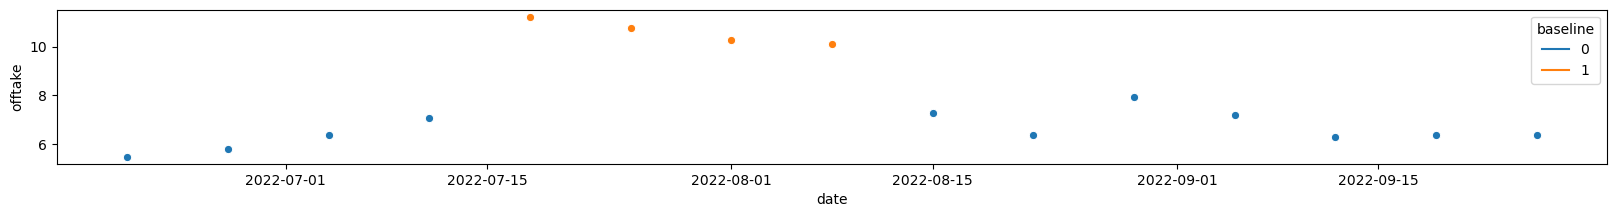

In [57]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='',hue="baseline")

In [58]:
from sklearn.model_selection import TimeSeriesSplit

In [59]:
tscv = TimeSeriesSplit(n_splits=5, test_size=10)

cv_ls = []
for train_index, valid_index in tscv.split(X_train):
    cv_ls.append((train_index, valid_index))

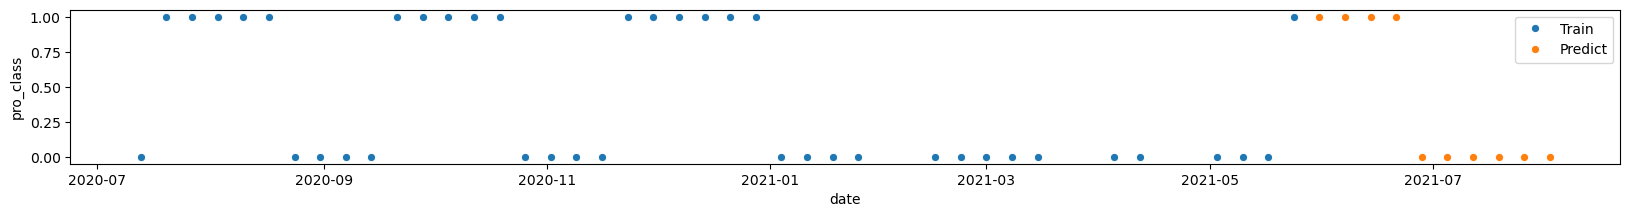

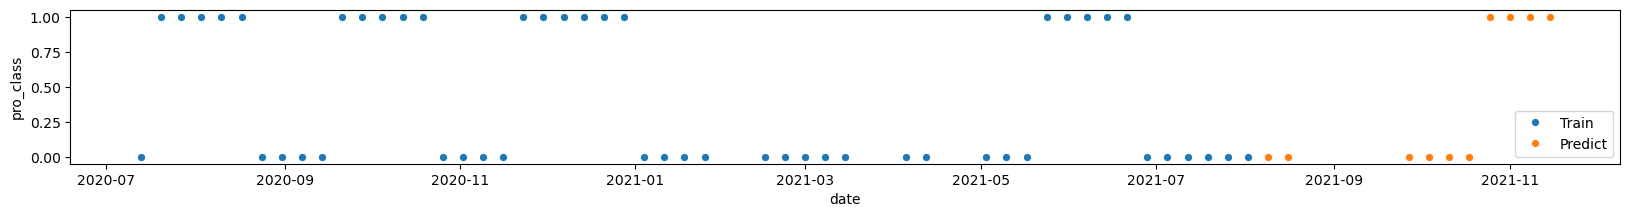

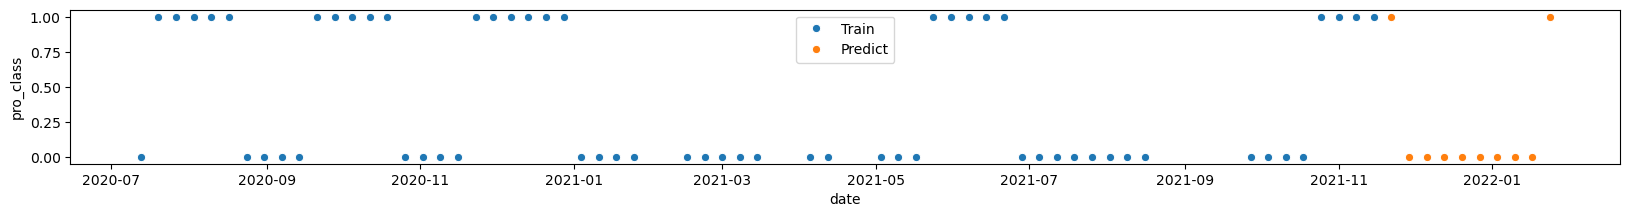

In [60]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train.iloc[cv_ls[0][0]], x="date", y="pro_class", marker='o', linestyle='')
sns.lineplot(data=train.iloc[cv_ls[0][1]], x="date", y="pro_class", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=train.iloc[cv_ls[1][0]], x="date", y="pro_class", marker='o', linestyle='')
sns.lineplot(data=train.iloc[cv_ls[1][1]], x="date", y="pro_class", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

plt.figure(figsize=(20, 2))
sns.lineplot(data=train.iloc[cv_ls[2][0]], x="date", y="pro_class", marker='o', linestyle='')
sns.lineplot(data=train.iloc[cv_ls[2][1]], x="date", y="pro_class", marker='o', linestyle='')
plt.legend(["Train", "Predict"])

### 4.2 RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
clf_rand = RandomForestClassifier(random_state=2022)

In [64]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ["auto", "sqrt", "log2"]}

In [65]:
grid = GridSearchCV(estimator=clf_rand, 
                    param_grid=param_grid, 
                    scoring="f1", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]),
                  array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])),
                 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                  array([50, 51, 52, 53, 54, 5...
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
                  array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89]))],
             estimator=RandomForestClassifier(random_state=2022), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'mi

In [66]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.6780219780219781
RandomForestClassifier(max_depth=5, random_state=2022)
{'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


In [67]:
opt_clf_rand = RandomForestClassifier(random_state=2022, max_depth= 5, max_features= 'auto', min_samples_split= 2, n_estimators=100)
opt_clf_rand.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=2022)

In [68]:
y_train_opt_clf_rand = opt_clf_rand.predict(X_train)
y_val_opt_clf_rand = opt_clf_rand.predict(X_val)

In [69]:
acc =  accuracy_score(y_train, y_train_opt_clf_rand)
cm = confusion_matrix(y_train, y_train_opt_clf_rand)

In [70]:
print(acc)

0.9888888888888889


In [71]:
print(cm)

[[56  0]
 [ 1 33]]


In [72]:
print( classification_report(y_train, y_train_opt_clf_rand, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       0.98      1.00      0.99        56
         pro       1.00      0.97      0.99        34

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



In [73]:
acc_val =  accuracy_score(y_val, y_val_opt_clf_rand)
cm_val = confusion_matrix(y_val, y_val_opt_clf_rand)

In [74]:
print(acc_val)

0.8666666666666667


In [75]:
print(cm_val)

[[10  1]
 [ 1  3]]


In [76]:
print( classification_report(y_val, y_val_opt_clf_rand, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       0.91      0.91      0.91        11
         pro       0.75      0.75      0.75         4

    accuracy                           0.87        15
   macro avg       0.83      0.83      0.83        15
weighted avg       0.87      0.87      0.87        15



In [77]:
train["clf_rand"] = y_train_opt_clf_rand
valid["clf_rand"] = y_val_opt_clf_rand

C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\2038515974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["clf_rand"] = y_train_opt_clf_rand
C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\2038515974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["clf_rand"] = y_val_opt_clf_rand


<AxesSubplot: xlabel='date', ylabel='offtake'>

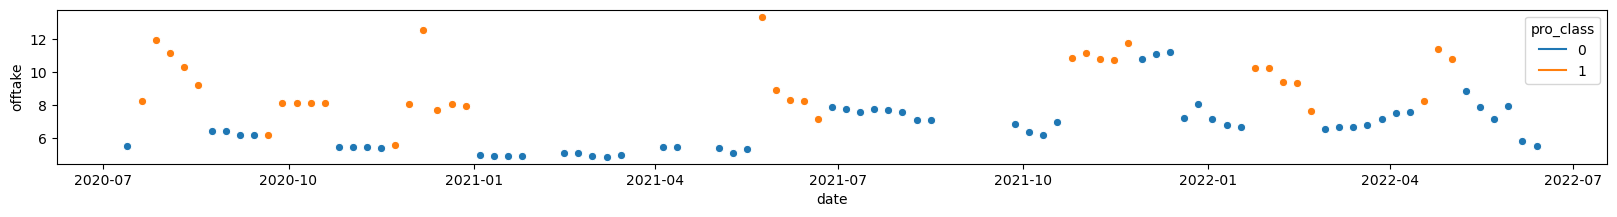

In [78]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='offtake'>

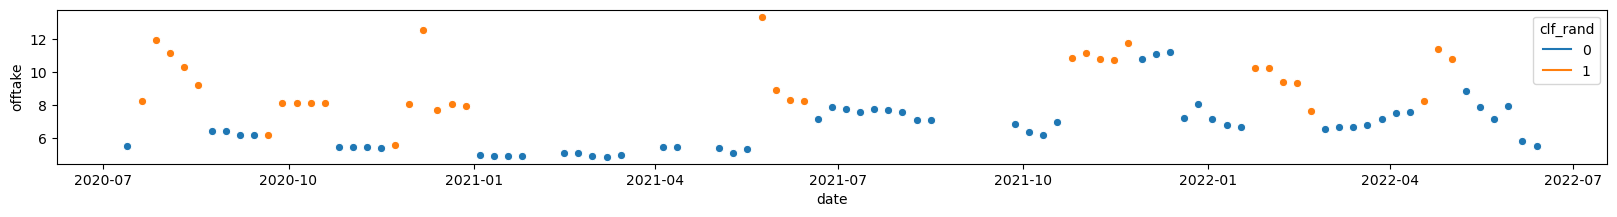

In [79]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='',hue="clf_rand")

<AxesSubplot: xlabel='date', ylabel='offtake'>

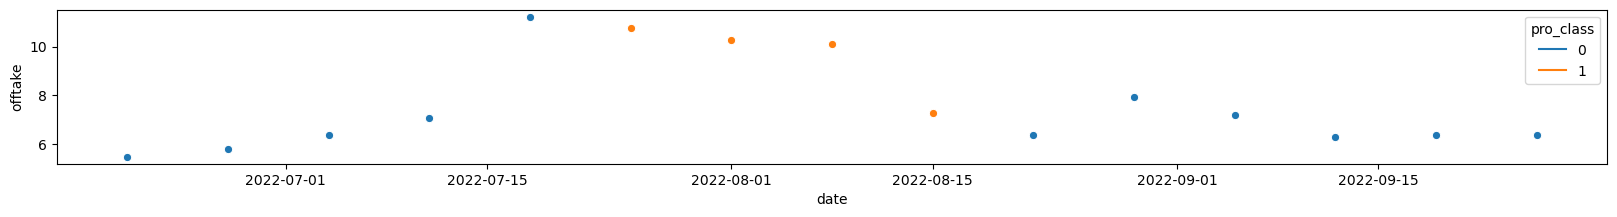

In [80]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='offtake'>

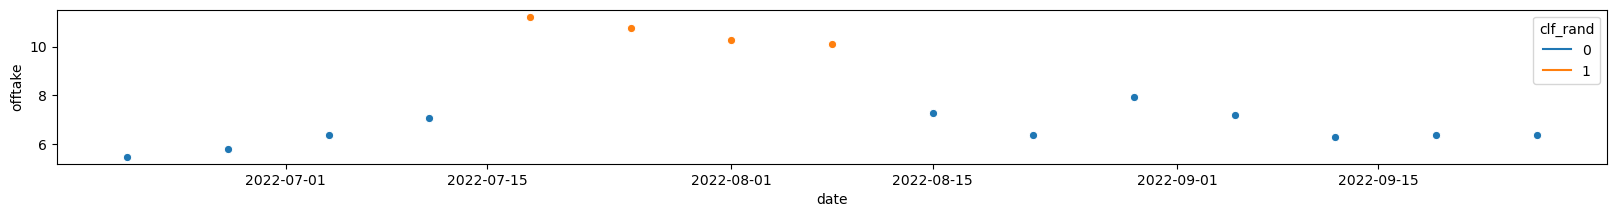

In [81]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='',hue="clf_rand")

### 4.3 XGBClassifier

In [82]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [83]:
from xgboost import XGBClassifier

In [84]:
clf_xgb = XGBClassifier(random_state=2022)

In [85]:
param_grid = {
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'colsample_bytree': np.arange(0.4, 1.0),
    'n_estimators': [100, 500, 1000]
}

In [86]:
grid = GridSearchCV(estimator=clf_xgb, 
                    param_grid=param_grid, 
                    scoring="f1", 
                    cv=cv_ls,
                    n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]),
                  array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])),
                 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                  array([50, 51, 52, 53, 54, 5...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2022, ...),
     

In [87]:
print(grid.best_score_)
print(grid.best_params_)

0.719047619047619
{'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [88]:
opt_clf_xgb = XGBClassifier(max_depth=3, learning_rate=0.01, colsample_bytree=0.4, n_estimators=500)
opt_clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [89]:
y_train_opt_clf_xgb = opt_clf_xgb.predict(X_train)
y_val_opt_clf_xgb = opt_clf_xgb.predict(X_val)

In [90]:
acc =  accuracy_score(y_train, y_train_opt_clf_xgb)
cm = confusion_matrix(y_train, y_train_opt_clf_xgb)

In [91]:
print(acc)

0.9888888888888889


In [92]:
print(cm)

[[56  0]
 [ 1 33]]


In [93]:
print( classification_report(y_train, y_train_opt_clf_xgb, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       0.98      1.00      0.99        56
         pro       1.00      0.97      0.99        34

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



In [94]:
acc_val =  accuracy_score(y_val, y_val_opt_clf_xgb)
cm_val = confusion_matrix(y_val, y_val_opt_clf_xgb)

In [95]:
print(acc_val)

0.8666666666666667


In [96]:
print(cm_val)

[[10  1]
 [ 1  3]]


In [97]:
print( classification_report(y_val, y_val_opt_clf_xgb, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       0.91      0.91      0.91        11
         pro       0.75      0.75      0.75         4

    accuracy                           0.87        15
   macro avg       0.83      0.83      0.83        15
weighted avg       0.87      0.87      0.87        15



In [98]:
train["clf_xgb"] = y_train_opt_clf_xgb
valid["clf_xgb"] = y_val_opt_clf_xgb

C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\3118524262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["clf_xgb"] = y_train_opt_clf_xgb
C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\3118524262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["clf_xgb"] = y_val_opt_clf_xgb


<AxesSubplot: xlabel='date', ylabel='offtake'>

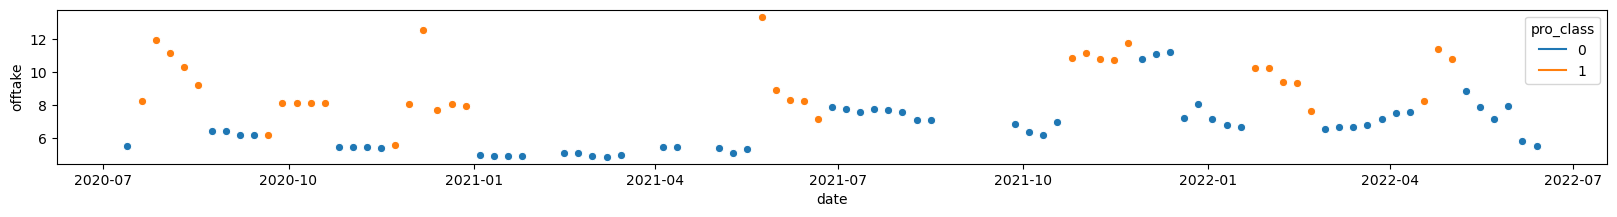

In [99]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='offtake'>

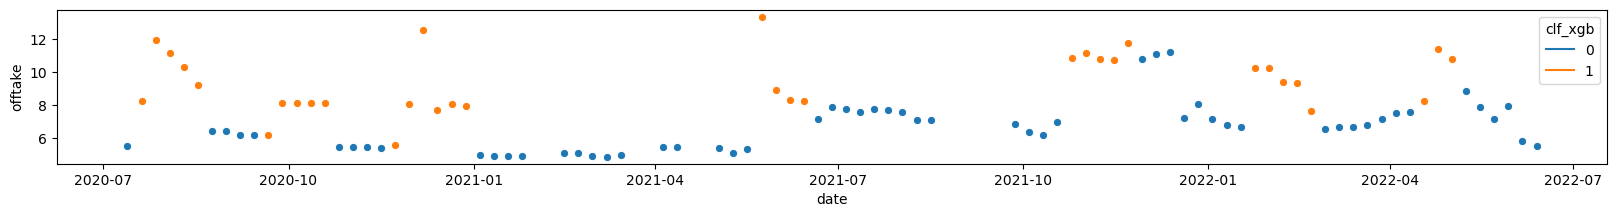

In [100]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='',hue="clf_xgb")

<AxesSubplot: xlabel='date', ylabel='offtake'>

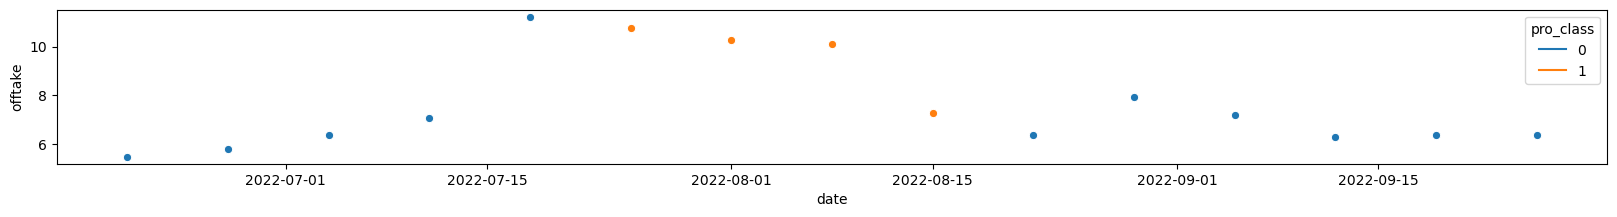

In [101]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='offtake'>

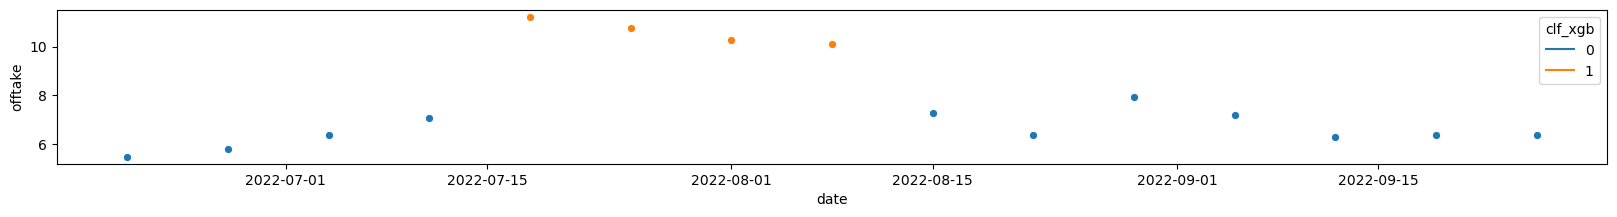

In [102]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='',hue="clf_xgb")

In [103]:
train

,date,year,month,week_of_year,sales_in,stores,offtake,pro,pro_class,baseline,clf_rand,clf_xgb
0,2020-07-13,2020,7,29,4170,19336,5.5161,RSP,0,0,0,0
1,2020-07-20,2020,7,30,35,21440,8.2377,2for,1,1,1,1
2,2020-07-27,2020,7,31,256,24646,11.9070,2for,1,1,1,1
3,2020-08-03,2020,8,32,756,23780,11.1780,2for,1,1,1,1
4,2020-08-10,2020,8,33,452,23017,10.2789,2for,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2022-05-16,2022,5,20,268,10340,7.8975,RSP,0,0,0,0
86,2022-05-23,2022,5,21,110,9968,7.1442,RSP,0,0,0,0
87,2022-05-30,2022,5,22,0,10440,7.9704,RSP,0,0,0,0
88,2022-06-06,2022,6,23,0,8457,5.8563,RSP,0,0,0,0


In [104]:
valid

,date,year,month,week_of_year,sales_in,stores,offtake,pro,pro_class,baseline,clf_rand,clf_xgb
90,2022-06-20,2022,6,25,32,7011,5.4918,RSP,0,0,0,0
91,2022-06-27,2022,6,26,149,6865,5.8077,RSP,0,0,0,0
92,2022-07-04,2022,7,27,161,7468,6.3666,RSP,0,0,0,0
93,2022-07-11,2022,7,28,253,7616,7.0713,RSP,0,0,0,0
94,2022-07-18,2022,7,29,107,8933,11.2266,RSP,0,1,1,1
95,2022-07-25,2022,7,30,246,8454,10.7649,2for,1,1,1,1
96,2022-08-01,2022,8,31,329,8333,10.2546,2for,1,1,1,1
97,2022-08-08,2022,8,32,195,8095,10.1088,2for,1,1,1,1
98,2022-08-15,2022,8,33,256,7395,7.2900,2for,1,0,0,0
99,2022-08-22,2022,8,34,163,7167,6.3666,RSP,0,0,0,0


### Feature_importances

In [105]:
feature_import = opt_clf_tree.feature_importances_
feature_import = pd.Series(feature_import, features_columns).sort_values(ascending= True)

In [106]:
feature_import

month           0.040839
week_of_year    0.060917
stores          0.112658
sales_in        0.198842
offtake         0.586745
dtype: float64

<AxesSubplot: >

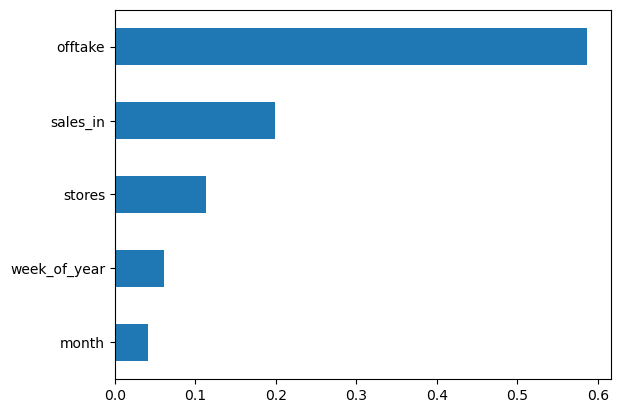

In [107]:
feature_import.plot(kind= 'barh')

### 4.4 guest model : Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
X_train_logis = train['offtake'].values
X_val_logis = valid['offtake'].values

y_train_logis = train['pro_class'].values
y_val_logis = valid['pro_class'].values

In [110]:
X_train_logis = X_train_logis.reshape(-1,1)
X_val_logis = X_val_logis.reshape(-1,1)

In [111]:
LogReg_clf = LogisticRegression(random_state = 0)

LogReg_clf.fit(X_train_logis, y_train_logis)

LogisticRegression(random_state=0)

In [112]:
y_pre_train_logis = LogReg_clf.predict(X_train_logis)
y_pred_val_logis = LogReg_clf.predict(X_val_logis)

In [113]:
train["y_pre_train_logis"] = y_pre_train_logis
valid["y_pre_train_logis"] = y_pred_val_logis

C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\1795958580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["y_pre_train_logis"] = y_pre_train_logis
C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\1795958580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["y_pre_train_logis"] = y_pred_val_logis


In [114]:
acc_test =  accuracy_score(y_train_logis, y_pre_train_logis)
cm_test = confusion_matrix(y_train_logis, y_pre_train_logis)

In [115]:
print(acc_test)

0.7777777777777778


In [116]:
print(cm_test)

[[52  4]
 [16 18]]


In [117]:
print( classification_report(y_train_logis, y_pre_train_logis, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       0.76      0.93      0.84        56
         pro       0.82      0.53      0.64        34

    accuracy                           0.78        90
   macro avg       0.79      0.73      0.74        90
weighted avg       0.78      0.78      0.76        90



In [118]:
acc_test =  accuracy_score(y_val_logis, y_pred_val_logis)
cm_test = confusion_matrix(y_val_logis, y_pred_val_logis)

In [119]:
print(acc_test)

0.8666666666666667


In [120]:
print(cm_test)

[[10  1]
 [ 1  3]]


In [121]:
print( classification_report(y_val_logis, y_pred_val_logis, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       0.91      0.91      0.91        11
         pro       0.75      0.75      0.75         4

    accuracy                           0.87        15
   macro avg       0.83      0.83      0.83        15
weighted avg       0.87      0.87      0.87        15



In [122]:
y_pred_val_logis_prob = LogReg_clf.predict_proba(X_val_logis)

In [123]:
y_pred_val_logis_prob

array([[0.92938928, 0.07061072],
       [0.90851692, 0.09148308],
       [0.85781892, 0.14218108],
       [0.76294878, 0.23705122],
       [0.0733494 , 0.9266506 ],
       [0.10672424, 0.89327576],
       [0.15847546, 0.84152454],
       [0.1765925 , 0.8234075 ],
       [0.7258964 , 0.2741036 ],
       [0.85781892, 0.14218108],
       [0.60121466, 0.39878534],
       [0.74280019, 0.25719981],
       [0.86556435, 0.13443565],
       [0.85781892, 0.14218108],
       [0.85781892, 0.14218108]])

In [124]:
train

,date,year,month,week_of_year,sales_in,stores,offtake,pro,pro_class,baseline,clf_rand,clf_xgb,y_pre_train_logis
0,2020-07-13,2020,7,29,4170,19336,5.5161,RSP,0,0,0,0,0
1,2020-07-20,2020,7,30,35,21440,8.2377,2for,1,1,1,1,0
2,2020-07-27,2020,7,31,256,24646,11.9070,2for,1,1,1,1,1
3,2020-08-03,2020,8,32,756,23780,11.1780,2for,1,1,1,1,1
4,2020-08-10,2020,8,33,452,23017,10.2789,2for,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2022-05-16,2022,5,20,268,10340,7.8975,RSP,0,0,0,0,0
86,2022-05-23,2022,5,21,110,9968,7.1442,RSP,0,0,0,0,0
87,2022-05-30,2022,5,22,0,10440,7.9704,RSP,0,0,0,0,0
88,2022-06-06,2022,6,23,0,8457,5.8563,RSP,0,0,0,0,0


In [125]:
valid

,date,year,month,week_of_year,sales_in,stores,offtake,pro,pro_class,baseline,clf_rand,clf_xgb,y_pre_train_logis
90,2022-06-20,2022,6,25,32,7011,5.4918,RSP,0,0,0,0,0
91,2022-06-27,2022,6,26,149,6865,5.8077,RSP,0,0,0,0,0
92,2022-07-04,2022,7,27,161,7468,6.3666,RSP,0,0,0,0,0
93,2022-07-11,2022,7,28,253,7616,7.0713,RSP,0,0,0,0,0
94,2022-07-18,2022,7,29,107,8933,11.2266,RSP,0,1,1,1,1
95,2022-07-25,2022,7,30,246,8454,10.7649,2for,1,1,1,1,1
96,2022-08-01,2022,8,31,329,8333,10.2546,2for,1,1,1,1,1
97,2022-08-08,2022,8,32,195,8095,10.1088,2for,1,1,1,1,1
98,2022-08-15,2022,8,33,256,7395,7.2900,2for,1,0,0,0,0
99,2022-08-22,2022,8,34,163,7167,6.3666,RSP,0,0,0,0,0


<AxesSubplot: xlabel='date', ylabel='offtake'>

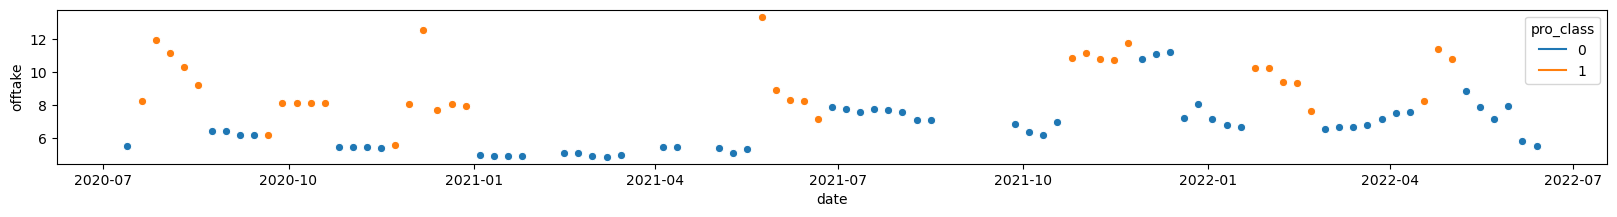

In [126]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='offtake'>

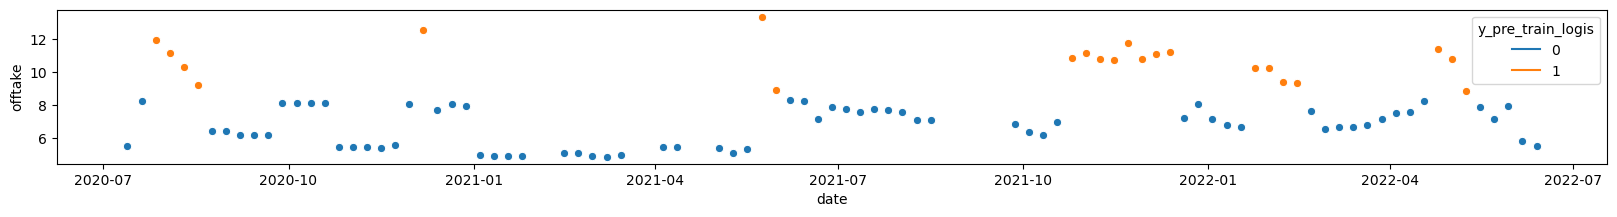

In [127]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=train, x="date", y="offtake", marker='o', linestyle='',hue="y_pre_train_logis")

<AxesSubplot: xlabel='date', ylabel='offtake'>

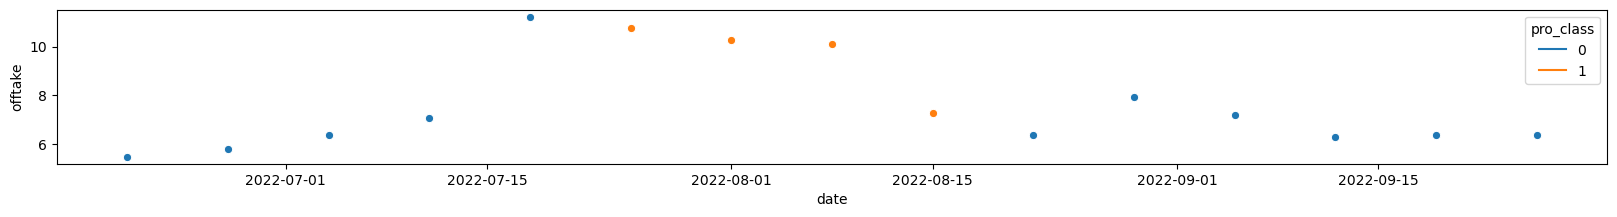

In [128]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='offtake'>

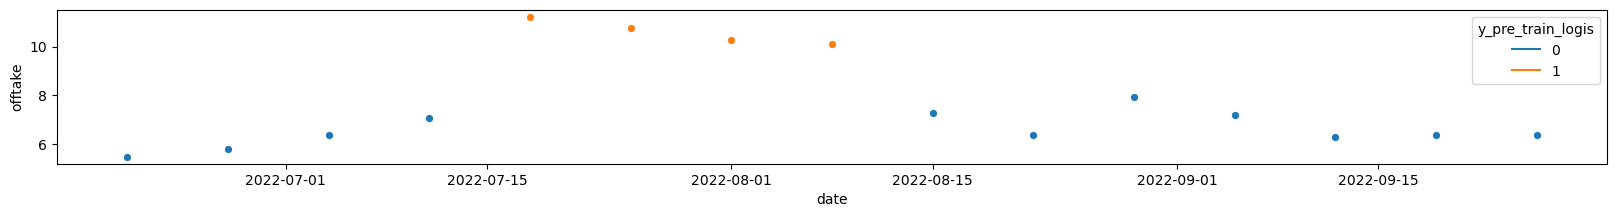

In [129]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=valid, x="date", y="offtake", marker='o', linestyle='',hue="y_pre_train_logis")

## 5. unseen data (df_test)

In [130]:
test_path = 'classification_pro_test.csv'
df_test = pd.read_csv(test_path)

df_test

,date,sales_in,stores,pro_npro,offtake
0,10/3/2022,124,7159,0,6.66
1,10/10/2022,2068,7478,0,7.05
2,10/17/2022,465,11451,0,7.29
3,10/24/2022,0,11835,1,8.63
4,10/31/2022,0,11733,1,8.41
5,11/7/2022,71,10994,0,6.44
6,11/14/2022,214,10962,0,6.37
7,11/21/2022,477,10581,0,6.32


In [131]:
print(df_train.shape ,df_test.shape)

(105, 9) (8, 5)


In [132]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['week_of_year'] = df_test['date'].dt.week

C:\Users\Mos\AppData\Local\Temp\ipykernel_15244\2630070787.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test['week_of_year'] = df_test['date'].dt.week


In [133]:
print(df_train.shape ,df_test.shape)

(105, 9) (8, 8)


In [134]:
print(df_train.columns)

Index(['date', 'year', 'month', 'week_of_year', 'sales_in', 'stores',
       'offtake', 'pro', 'pro_class'],
      dtype='object')


In [135]:
print(df_test.columns)

Index(['date', 'sales_in', 'stores', 'pro_npro', 'offtake', 'year', 'month',
       'week_of_year'],
      dtype='object')


In [136]:
features_columns

['month', 'week_of_year', 'sales_in', 'stores', 'offtake']

In [137]:
df_test = df_test[['date','year','month','week_of_year','sales_in','stores','offtake','pro_npro']]
df_test = df_test.rename(columns = {'pro_npro' : 'pro_class'})

In [138]:
X_test = df_test[features_columns].values
y_test = df_test["pro_class"].tolist()

In [139]:
X_test

array([[1.0000e+01, 4.0000e+01, 1.2400e+02, 7.1590e+03, 6.6600e+00],
       [1.0000e+01, 4.1000e+01, 2.0680e+03, 7.4780e+03, 7.0500e+00],
       [1.0000e+01, 4.2000e+01, 4.6500e+02, 1.1451e+04, 7.2900e+00],
       [1.0000e+01, 4.3000e+01, 0.0000e+00, 1.1835e+04, 8.6300e+00],
       [1.0000e+01, 4.4000e+01, 0.0000e+00, 1.1733e+04, 8.4100e+00],
       [1.1000e+01, 4.5000e+01, 7.1000e+01, 1.0994e+04, 6.4400e+00],
       [1.1000e+01, 4.6000e+01, 2.1400e+02, 1.0962e+04, 6.3700e+00],
       [1.1000e+01, 4.7000e+01, 4.7700e+02, 1.0581e+04, 6.3200e+00]])

In [140]:
y_test

[0, 0, 0, 1, 1, 0, 0, 0]

### 5.1 Test with DecisionTreeClassifier

In [141]:
y_train_opt_clf_tree = opt_clf_tree.predict(X_train)
y_test_opt_clf_tree = opt_clf_tree.predict(X_test)

In [142]:
df_test["opt_clf_tree_test"] = y_test_opt_clf_tree

In [143]:
df_test

,date,year,month,week_of_year,sales_in,stores,offtake,pro_class,opt_clf_tree_test
0,2022-10-03,2022,10,40,124,7159,6.66,0,0
1,2022-10-10,2022,10,41,2068,7478,7.05,0,0
2,2022-10-17,2022,10,42,465,11451,7.29,0,0
3,2022-10-24,2022,10,43,0,11835,8.63,1,0
4,2022-10-31,2022,10,44,0,11733,8.41,1,0
5,2022-11-07,2022,11,45,71,10994,6.44,0,0
6,2022-11-14,2022,11,46,214,10962,6.37,0,0
7,2022-11-21,2022,11,47,477,10581,6.32,0,0


In [144]:
print( classification_report(y_train, y_train_opt_clf_tree, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       0.98      1.00      0.99        56
         pro       1.00      0.97      0.99        34

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



In [145]:
acc_test =  accuracy_score(y_test, y_test_opt_clf_tree)
cm_test = confusion_matrix(y_test, y_test_opt_clf_tree)

In [146]:
print(acc_test)

0.75


In [147]:
print(cm_test)

[[6 0]
 [2 0]]


In [148]:
print( classification_report(y_test, y_test_opt_clf_tree, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       0.75      1.00      0.86         6
         pro       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mos\anaconda3\envs\supervise\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
df_test

,date,year,month,week_of_year,sales_in,stores,offtake,pro_class,opt_clf_tree_test
0,2022-10-03,2022,10,40,124,7159,6.66,0,0
1,2022-10-10,2022,10,41,2068,7478,7.05,0,0
2,2022-10-17,2022,10,42,465,11451,7.29,0,0
3,2022-10-24,2022,10,43,0,11835,8.63,1,0
4,2022-10-31,2022,10,44,0,11733,8.41,1,0
5,2022-11-07,2022,11,45,71,10994,6.44,0,0
6,2022-11-14,2022,11,46,214,10962,6.37,0,0
7,2022-11-21,2022,11,47,477,10581,6.32,0,0


<AxesSubplot: xlabel='date', ylabel='offtake'>

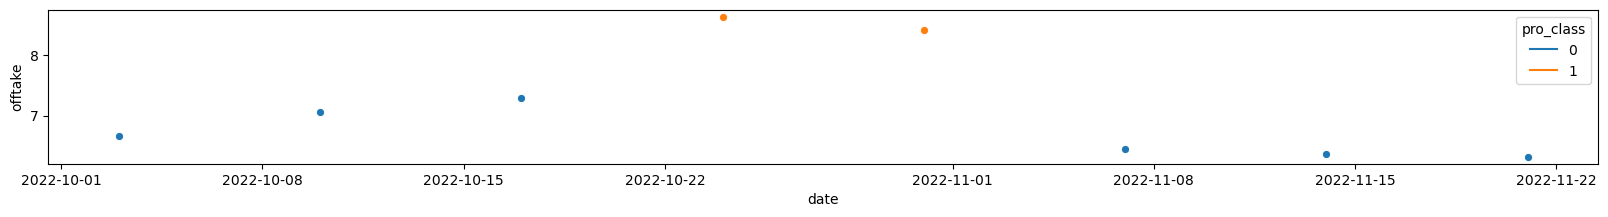

In [150]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_test, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='offtake'>

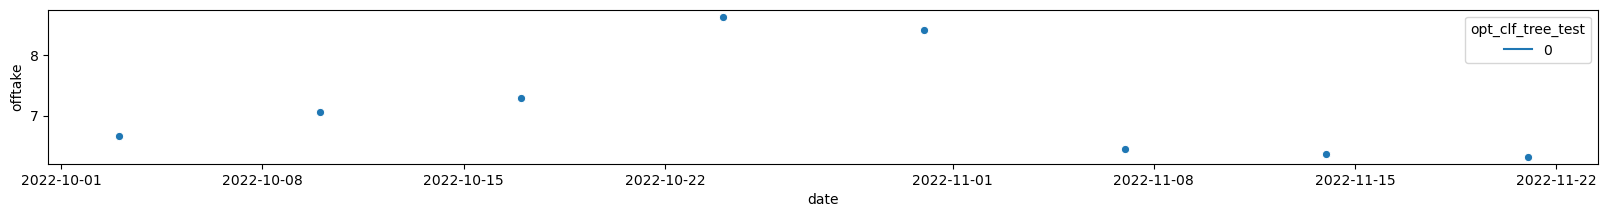

In [151]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_test, x="date", y="offtake", marker='o', linestyle='',hue="opt_clf_tree_test")

### 5.2 test with guest model : Logistic Regression

In [152]:
X_test_logis = df_test['offtake'].values
y_test_logis = df_test['pro_class'].values

In [153]:
X_test_logis = X_test_logis.reshape(-1,1)

In [154]:
y_pred_test_logis = LogReg_clf.predict(X_test_logis)

In [155]:
df_test["y_pred_test_logis"] = y_pred_test_logis

In [156]:
acc_test =  accuracy_score(y_test_logis, y_pred_test_logis)
cm_test = confusion_matrix(y_test_logis, y_pred_test_logis)

In [157]:
print(acc_test)

1.0


In [158]:
print(cm_test)

[[6 0]
 [0 2]]


In [159]:
print( classification_report(y_test_logis, y_pred_test_logis, target_names = ['RSP' , 'pro']))

              precision    recall  f1-score   support

         RSP       1.00      1.00      1.00         6
         pro       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [160]:
y_pred_test_logis_prob = LogReg_clf.predict_proba(X_test_logis)

In [161]:
y_pred_test_logis_prob

array([[0.82283417, 0.17716583],
       [0.76636666, 0.23363334],
       [0.7258964 , 0.2741036 ],
       [0.44498142, 0.55501858],
       [0.49380123, 0.50619877],
       [0.84964778, 0.15035222],
       [0.85744875, 0.14255125],
       [0.86281199, 0.13718801]])

In [162]:
df_test

,date,year,month,week_of_year,sales_in,stores,offtake,pro_class,opt_clf_tree_test,y_pred_test_logis
0,2022-10-03,2022,10,40,124,7159,6.66,0,0,0
1,2022-10-10,2022,10,41,2068,7478,7.05,0,0,0
2,2022-10-17,2022,10,42,465,11451,7.29,0,0,0
3,2022-10-24,2022,10,43,0,11835,8.63,1,0,1
4,2022-10-31,2022,10,44,0,11733,8.41,1,0,1
5,2022-11-07,2022,11,45,71,10994,6.44,0,0,0
6,2022-11-14,2022,11,46,214,10962,6.37,0,0,0
7,2022-11-21,2022,11,47,477,10581,6.32,0,0,0


<AxesSubplot: xlabel='date', ylabel='offtake'>

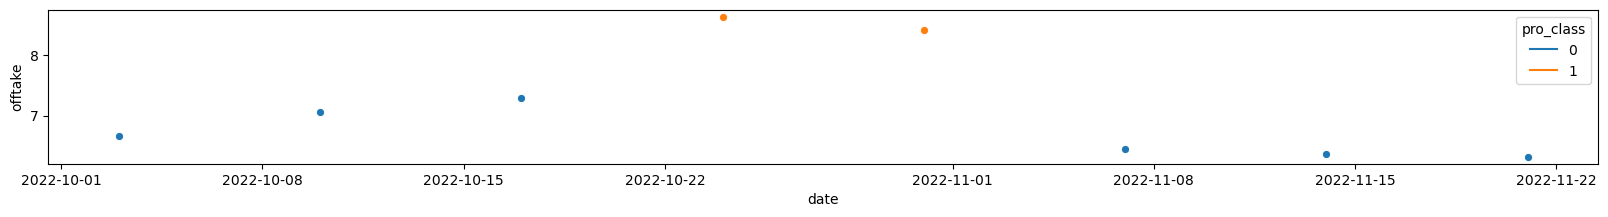

In [163]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_test, x="date", y="offtake", marker='o', linestyle='',hue="pro_class")

<AxesSubplot: xlabel='date', ylabel='offtake'>

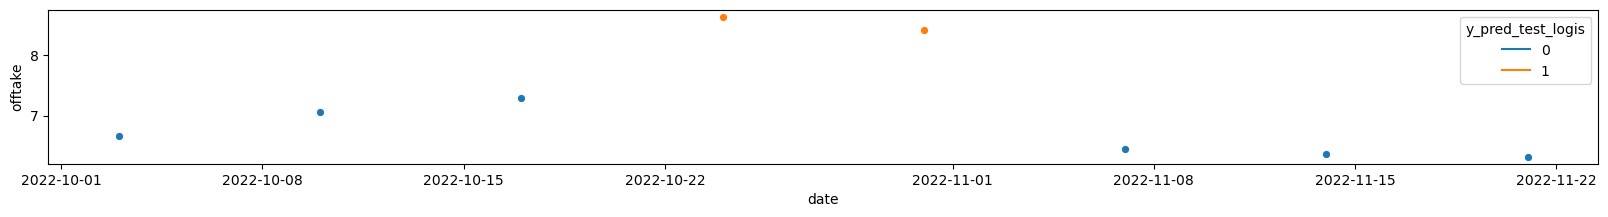

In [164]:
plt.figure(figsize=(20, 2))
sns.lineplot(data=df_test, x="date", y="offtake", marker='o', linestyle='',hue="y_pred_test_logis")

In [165]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test_logis_prob[:,1])

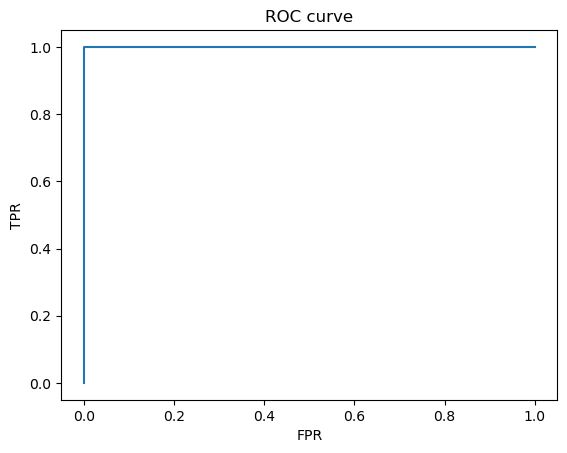

In [166]:
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()